In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_start = pd.read_csv("responses_as_num.csv")

In [3]:
df_start.head()

,filename,CA1,CA1.1,CA1.2,CA1.3,CA1.4,CA1.5,CA1.6,CA1.7,CA2,...,UNIQ_WORDS,OR_ERR,CLQ_WORDS,CLC_ERRORS,prop_a1,prop_a2,prop_b1,prop_b2,prop_c1,prop_c2
0,772.txt,0,1,1,0,1,1,1,1,0,...,0.423423,0.000000,0.0,0.231707,0.361702,0.297872,0.117021,0.191489,0.031915,0.0
1,481.txt,0,0,1,0,0,1,1,0,0,...,0.476190,0.500000,0.0,0.157143,0.700000,0.066667,0.133333,0.100000,0.000000,0.0
2,672.txt,0,0,1,0,0,1,1,0,0,...,0.472222,0.600000,0.0,0.234568,0.529412,0.117647,0.088235,0.235294,0.029412,0.0
3,479.txt,0,0,1,0,0,0,0,0,0,...,0.545455,0.000000,0.0,0.253968,0.633333,0.133333,0.166667,0.066667,0.000000,0.0
4,624.txt,0,0,1,0,1,1,1,0,0,...,0.519481,0.666667,0.0,0.240964,0.400000,0.250000,0.125000,0.225000,0.000000,0.0


<Figure size 1000x100 with 0 Axes>

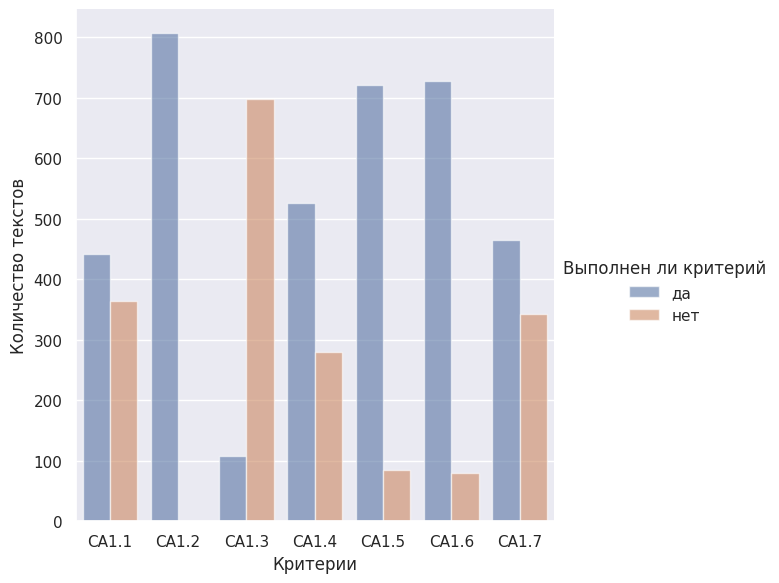

In [4]:
plt.figure(figsize=(10, 1))
features = ['CA1.1','CA1.2', 'CA1.3','CA1.4', 'CA1.5', 'CA1.6', 'CA1.7']
df = df_start[features]
text_num = len(df)
sums = df.sum()
df_criteria = pd.DataFrame(sums)
df_criteria['Выполнен ли критерий'] = 'да'
df_criteria_no = pd.DataFrame(text_num - df_criteria[0])
df_criteria_no['Выполнен ли критерий'] = 'нет'
df_criteria = pd.concat([df_criteria, df_criteria_no])
df_criteria.rename({0: "Количество текстов"}, axis='columns', inplace=True)
sns.set(font_scale=1)
sns.catplot(data=df_criteria, kind="bar",
           x=df_criteria.index, y="Количество текстов", hue="Выполнен ли критерий",
           alpha=.6, height=6).set_axis_labels("Критерии", "Количество текстов")
plt.savefig('./graphics/CA criteria.png')

<Figure size 1000x100 with 0 Axes>

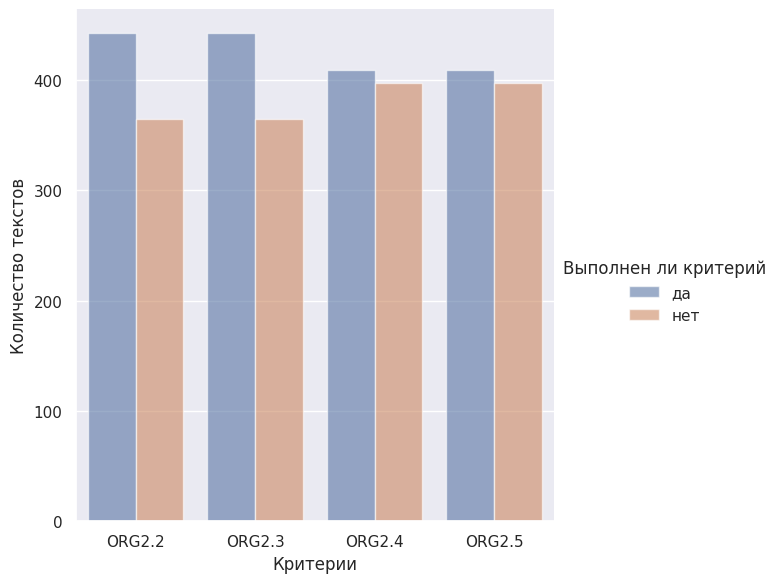

In [5]:
plt.figure(figsize=(10, 1))
features = ['ORG2.2','ORG2.3', 'ORG2.4', 'ORG2.5']
df = df_start[features]
text_num = len(df)
sums = df.sum()
df_criteria = pd.DataFrame(sums)
df_criteria['Выполнен ли критерий'] = 'да'
df_criteria_no = pd.DataFrame(text_num - df_criteria[0])
df_criteria_no['Выполнен ли критерий'] = 'нет'
df_criteria = pd.concat([df_criteria, df_criteria_no])
df_criteria.rename({0: "Количество текстов"}, axis='columns', inplace=True)
sns.set(font_scale=1)
sns.catplot(data=df_criteria, kind="bar",
           x=df_criteria.index, y="Количество текстов", hue="Выполнен ли критерий",
           alpha=.6, height=6).set_axis_labels("Критерии", "Количество текстов")
plt.savefig('./graphics/ORG criteria.png')

<Figure size 500x100 with 0 Axes>

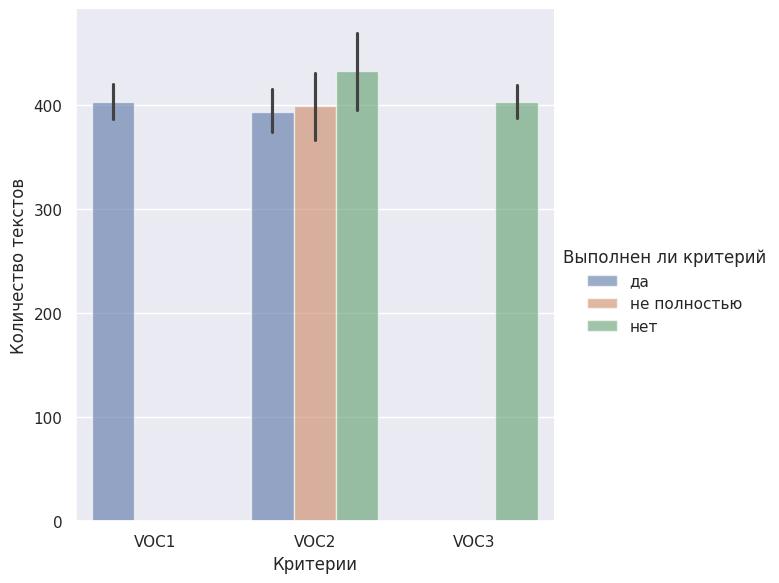

In [6]:
features = ['VOC1', 'VOC2', 'VOC3']
df = df_start[features]

df_criteria = df.apply(lambda row: row.apply(lambda x: 'да' if x == 1 
                                              else 'не полностью' if x == 0.5
                                              else 'нет'), axis='columns')

# Преобразование данных для использования с Seaborn
df_criteria = df_criteria.reset_index().melt(id_vars='index', var_name='Критерии', value_name='Выполнен ли критерий')
df_criteria.columns = ['Количество текстов', 'Критерии', 'Выполнен ли критерий']

# Построение графика
plt.figure(figsize=(5, 1))
sns.set(font_scale=1)
sns.catplot(data=df_criteria, kind="bar", 
            x='Критерии', y='Количество текстов', hue='Выполнен ли критерий',
            alpha=.6, height=6).set_axis_labels("Критерии", "Количество текстов")
plt.savefig('./graphics/VOC_criteria.png')
plt.show()


In [7]:
df_start.CLC_ERRORS.mean()

0.26778706535853036

In [8]:
df = df_start.copy()
features = ['prop_a1','prop_a2','prop_b1','prop_b2','prop_c1','prop_c2']
# Предполагаем, что уровень текста соответствует доле слов уровней, 
# умноженных на порядковые номера этих уровней.
df['leveltext_by_words'] = [a1 + 2*a2 + 3*b1 + 4*b2 + 5*c1 + 6*c2 
                            for a1, a2, b1, b2, c1, c2 
                            in zip(df[features[0]], df[features[1]], df[features[2]], 
                                   df[features[3]], df[features[4]], df[features[5]])]
# Приводим долю ошибок коллокаций к нулевому среднему,
# это позволит снизить ущерб от неполноты словаря к минимуму
df.CLC_ERRORS = df.CLC_ERRORS.apply(lambda x: x - df_start.CLC_ERRORS.mean())

<Figure size 300x100 with 0 Axes>

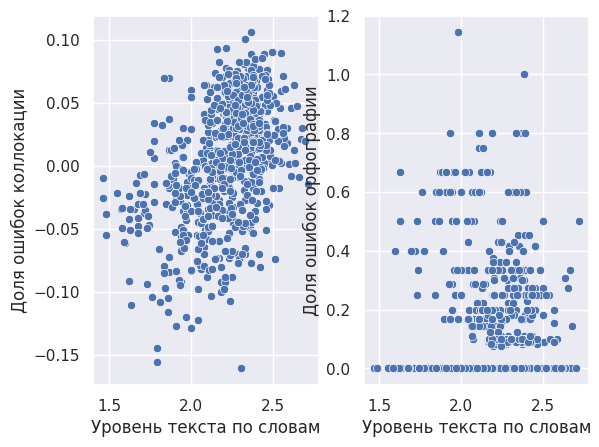

In [9]:
plt.figure(figsize=(3,1))
fig, ax = plt.subplots(ncols=2)
sns.scatterplot(data=df, x ='leveltext_by_words', y = 'CLC_ERRORS', ax=ax[0]).set(xlabel="Уровень текста по словам", 
                                                                        ylabel="Доля ошибок коллокации")
sns.scatterplot(data=df, x ='leveltext_by_words', y = 'OR_ERR', ax=ax[1]).set(xlabel="Уровень текста по словам", 
                                                                        ylabel="Доля ошибок орфографии")

plt.savefig('./graphics/CLC_and_OR_errors.png')

In [10]:
import os
os.getcwd()

'/home/qw1n/PycharmProjects/ProjectManager/analysis/metrics analysis'